RAO 3 Algorithm

Name    : <br>
SID     :

# Install Dependicies

In [1]:
%pip install matplotlib numpy pillow

Note: you may need to restart the kernel to use updated packages.


# Fungsi F16

Fungsi F16 didapat kan dari <br>

https://www.mathworks.com/matlabcentral/fileexchange/125645-drawing-code-for-mathematical-benchmark-functions

In [2]:
def f16(x1, x2):
    return 4*x1**2 - 2.1*x1**4 + (1/3)*x1**6 + x1*x2 - 4*x2**2 + 4*x2**4

# Kode

## Import Library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import math

## Parameter

Parameter di dalam firefly algorithm ada berapa jenis seperti yang dijelaskan di bawah ini

In [4]:
# Parameter Firefly Algorithm
n = 50  # Jumlah kunang-kunang dalam 1 populasi
max_iter = 100 # Jumlah iteras
alpha = 0.5  # Learning rate

Parameter yang digunakan disini hanya digunakan untuk kebutuhan visualisasi

## Inisialisasi Populasi

Ada beberapa baris kode yang akan di implemetasi sebagai Inisialisi Populasi. <br>

1. np.random.seed berguna untuk memastikan bilangan acak setidaknya dapat di replikasi karena memiliki seed yang sama
2. Array untuk menyimpan para kunang kunang
3. Menghitung fitness fireflies itu sendiri

In [5]:
np.random.seed(42)
pop = np.random.uniform(-0.7, 0.7, (n, 2))
fitness = f16(pop[:, 0], pop[:, 1]) 

In [6]:
# Simpan data untuk animasi
history = []

## RAO3 Algorithm

Firefly Algorithm adalah algoritma yang diilhami oleh perilaku kunang-kunang. Prinsip utamanya adalah bahwa kunang-kunang akan tertarik pada cahaya yang lebih terang, dan mereka bergerak menuju kunang-kunang yang lebih terang.

In [7]:
for t in range(max_iter):
    history.append(pop.copy())
    best = pop[np.argmin(fitness)]
    worst = pop[np.argmax(fitness)]
    
    for i in range(n):
        r = np.random.rand(2)  # Random coefficients
        k = np.random.choice(n, 1)[0]
        if fitness[i] < fitness[k]:
            new_sol = pop[i] + r[0] * (best - np.abs(worst)) + r[1] * (np.abs(pop[i]) - pop[k])
        else:
            new_sol = pop[i] + r[0] * (best - np.abs(worst)) + r[1] * (np.abs(pop[k]) - pop[i])
        
        new_sol = np.clip(new_sol, -0.7, 0.7)  # Ensure new solutions are within bounds
        new_fitness = f16(new_sol[0], new_sol[1])
        
        if new_fitness < fitness[i]:
            pop[i] = new_sol
            fitness[i] = new_fitness

history.append(pop.copy())

## Buat GIF dari data yang telah ada

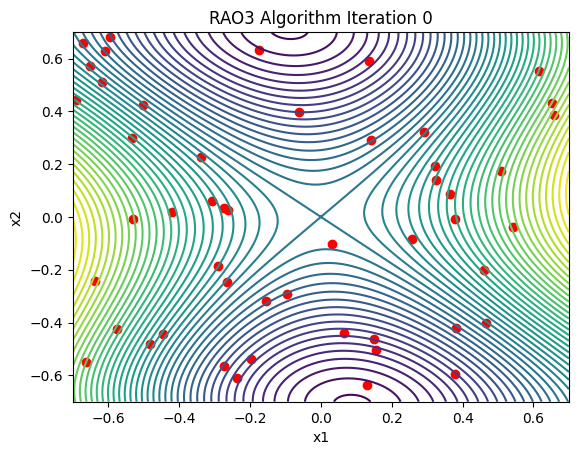

In [8]:
# Plot hasil dan animasi
X1 = np.linspace(-0.7, 0.7, 400)
X2 = np.linspace(-0.7, 0.7, 400)
X1, X2 = np.meshgrid(X1, X2)
Z = f16(X1, X2)

fig, ax = plt.subplots()
contour = ax.contourf(X1, X2, Z, levels=100,cmap="viridis")
scatter = ax.scatter(pop[:, 0], pop[:, 1], c='red',zorder=5)

def update(frame):
    ax.clear()
    ax.contour(X1, X2, Z, levels=50)
    ax.scatter(history[frame][:, 0], history[frame][:, 1], c='red')
    ax.set_title('RAO3 Algorithm Iteration {}'.format(frame))
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

ani = FuncAnimation(fig, update, frames=len(history), repeat=False) # type: ignore

# Simpan animasi sebagai GIF
ani.save("rao3_3.gif", writer='pillow',fps=10)